# 1. **Descompresión**
___

In [4]:
# Descomprimir archivo

# 2. **Importar Librerías**
___

In [5]:
# Importar librerias para EDA y regresión logística
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier

# 3. **Análisis Exploratorio de Datos (EDA)**
---

# 3.1. **Análisis Inicial**
___

In [6]:
# Cargar el dataset ubicado en la carpeta donde esta este archivo
df = pd.read_csv('heart_cleveland_upload.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Información general del dataset
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

In [7]:
# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

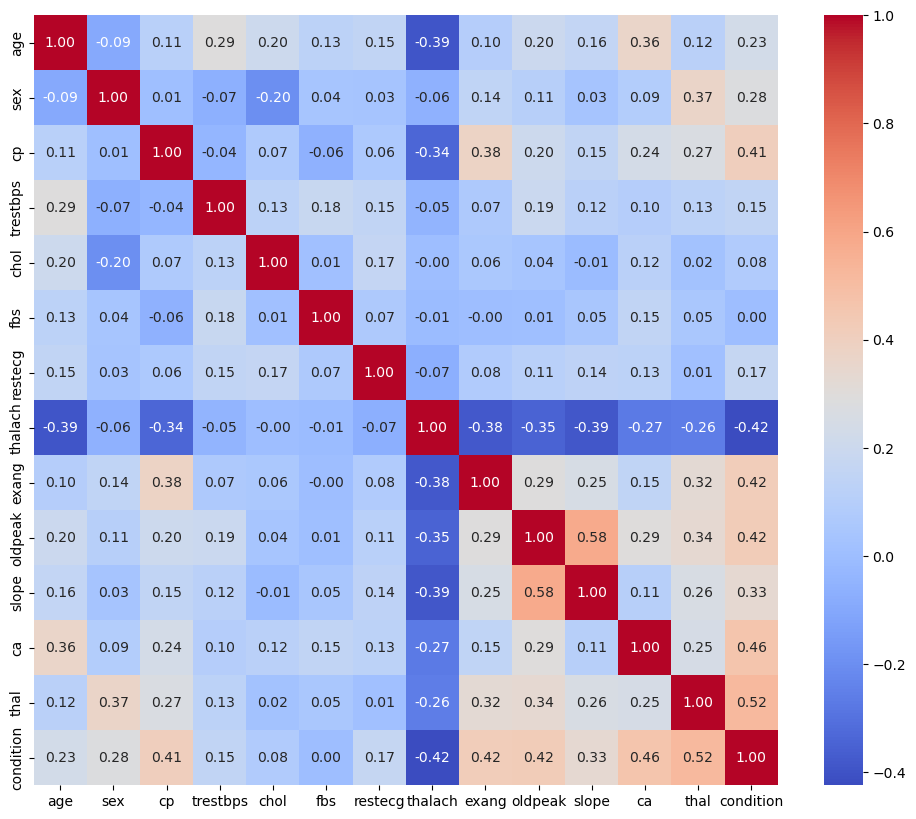

In [8]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

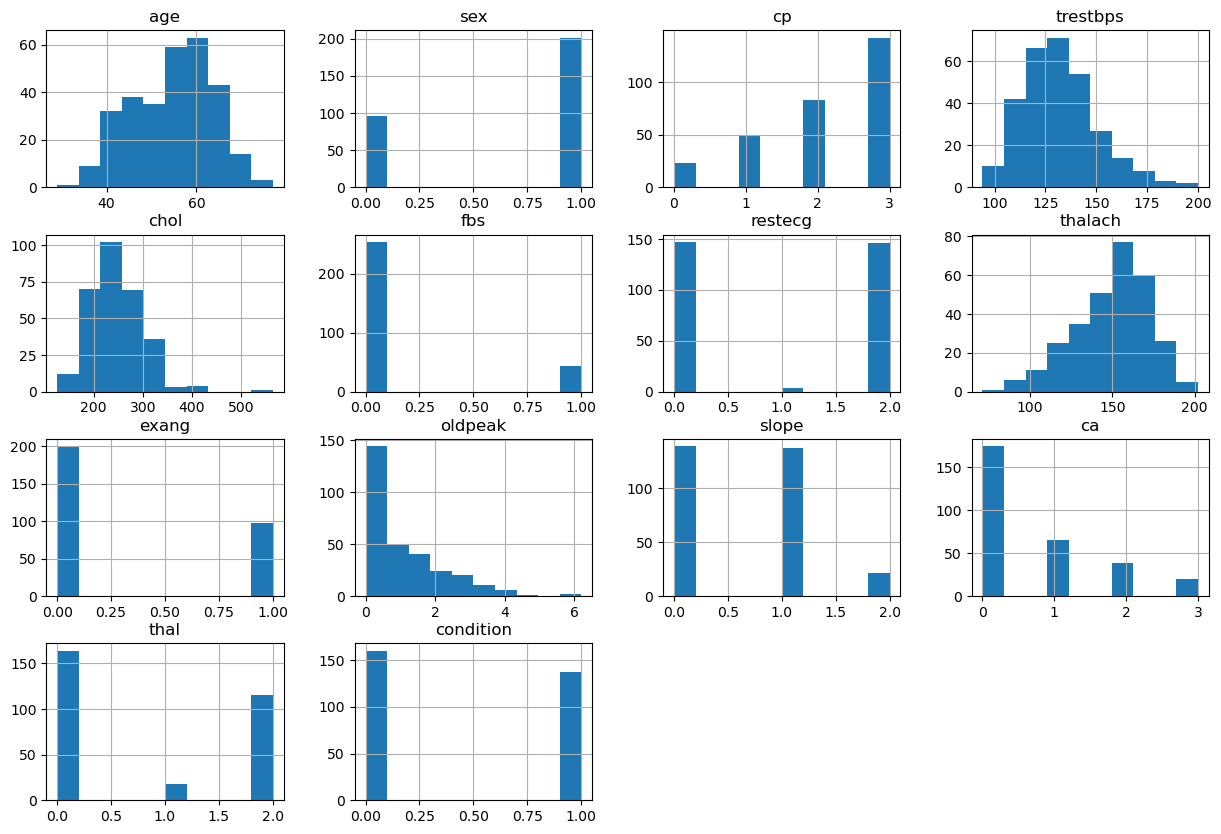

In [9]:
# Histograma de las variables
df.hist(figsize=(15, 10))
plt.show()

# 3.2. **Diccionario de datos**
---



In [10]:
# Diccionario de datos del dataset
data_dictionary = {
    "Edad": {
        "Descripción": "Edad del paciente en años",
        "Tipo de dato": "Entero"
    },
    "Sexo": {
        "Descripción": "Sexo del paciente (1 = hombre, 0 = mujer)",
        "Tipo de dato": "Entero (binario)"
    },
    "cp": {
        "Descripción": "Tipo de dolor torácico",
        "Valores": {
            0: "Angina típica",
            1: "Angina atípica",
            2: "Dolor no anginoso",
            3: "Asintomático"
        },
        "Tipo de dato": "Entero"
    },
    "trestbps": {
        "Descripción": "Presión arterial en reposo (mm Hg al ingreso en el hospital)",
        "Tipo de dato": "Entero"
    },
    "chol": {
        "Descripción": "Colesterol sérico en mg/dl",
        "Tipo de dato": "Entero"
    },
    "fbs": {
        "Descripción": "Glucemia en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)",
        "Tipo de dato": "Entero (binario)"
    },
    "restecg": {
        "Descripción": "Resultados electrocardiográficos en reposo",
        "Valores": {
            0: "Normal",
            1: "Anormalidad en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV)",
            2: "Hipertrofia ventricular izquierda probable o definitiva según criterio de Estes"
        },
        "Tipo de dato": "Entero"
    },
    "thalach": {
        "Descripción": "Frecuencia cardíaca máxima alcanzada",
        "Tipo de dato": "Entero"
    },
    "exang": {
        "Descripción": "Angina inducida por el ejercicio (1 = sí, 0 = no)",
        "Tipo de dato": "Entero (binario)"
    },
    "oldpeak": {
        "Descripción": "Depresión del segmento ST inducida por el ejercicio en relación con el reposo",
        "Tipo de dato": "Decimal"
    },
    "pendiente": {
        "Descripción": "Pendiente del segmento ST en el ejercicio máximo",
        "Valores": {
            0: "Ascendente",
            1: "Plano",
            2: "Descendente"
        },
        "Tipo de dato": "Entero"
    },
    "ca": {
        "Descripción": "Número de vasos principales (0-3) coloreados por fluorosopía",
        "Tipo de dato": "Entero"
    },
    "thal": {
        "Descripción": "Condición de thal",
        "Valores": {
            0: "Normal",
            1: "Defecto corregido",
            2: "Defecto reversible"
        },
        "Tipo de dato": "Entero"
    },
    "Condición": {
        "Descripción": "Presencia de enfermedad cardíaca (0 = sin enfermedad, 1 = enfermedad)",
        "Tipo de dato": "Entero (binario)"
    }
}

In [11]:
# Mostrar paletas de colores
print("Paletas de colores disponibles:")
print(plt.colormaps())

Paletas de colores disponibles:
['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', '

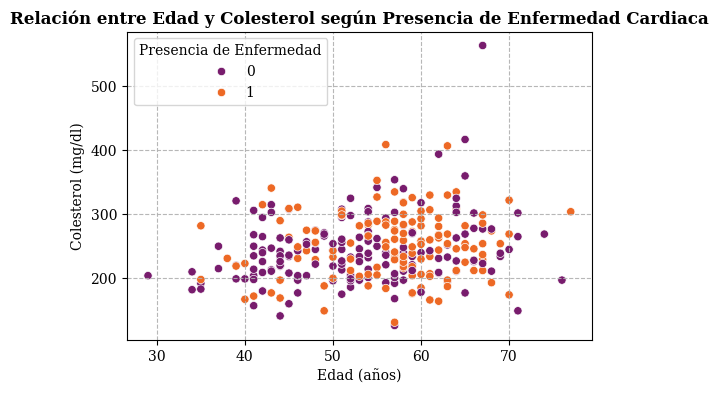

In [12]:
# Grafica de dispersión

# Letra serif para scatter plots
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='chol', data=df, hue='condition', palette='inferno')
plt.title('Relación entre Edad y Colesterol según Presencia de Enfermedad Cardiaca', fontweight='bold')
plt.xlabel('Edad (años)')
plt.ylabel('Colesterol (mg/dl)')
plt.legend(title='Presencia de Enfermedad')
plt.grid(True, linestyle='--', alpha=0.9)
plt.show()

# 3.3. **Análisis de Variables Categóricas**
---
- No existen en este conjunto de datos...
---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


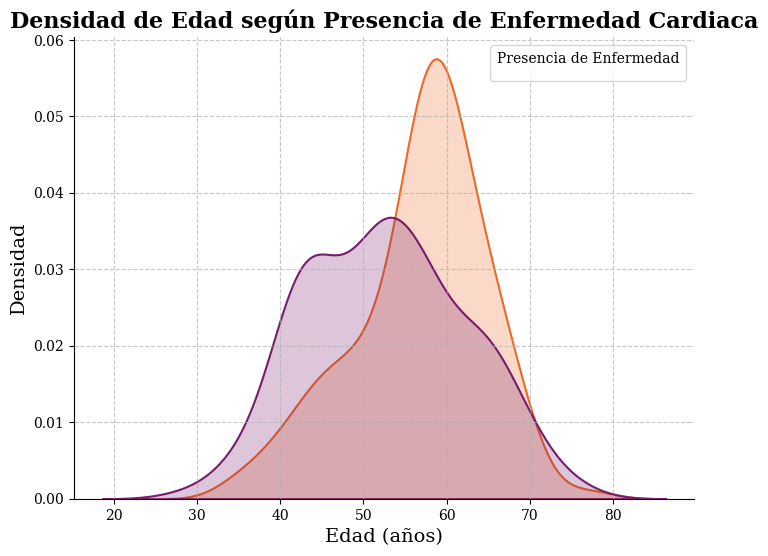

In [13]:
import warnings
warnings.filterwarnings('ignore')

# Crear la gráfica de densidad con estilo moderno
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='age', hue='condition', fill=True, common_norm=False, palette='inferno', linewidth=1.5)
plt.title('Densidad de Edad según Presencia de Enfermedad Cardiaca', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Agregar cuadrícula
plt.legend(title='Presencia de Enfermedad', fontsize=12)
sns.despine() # Para un estilo más moderno

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


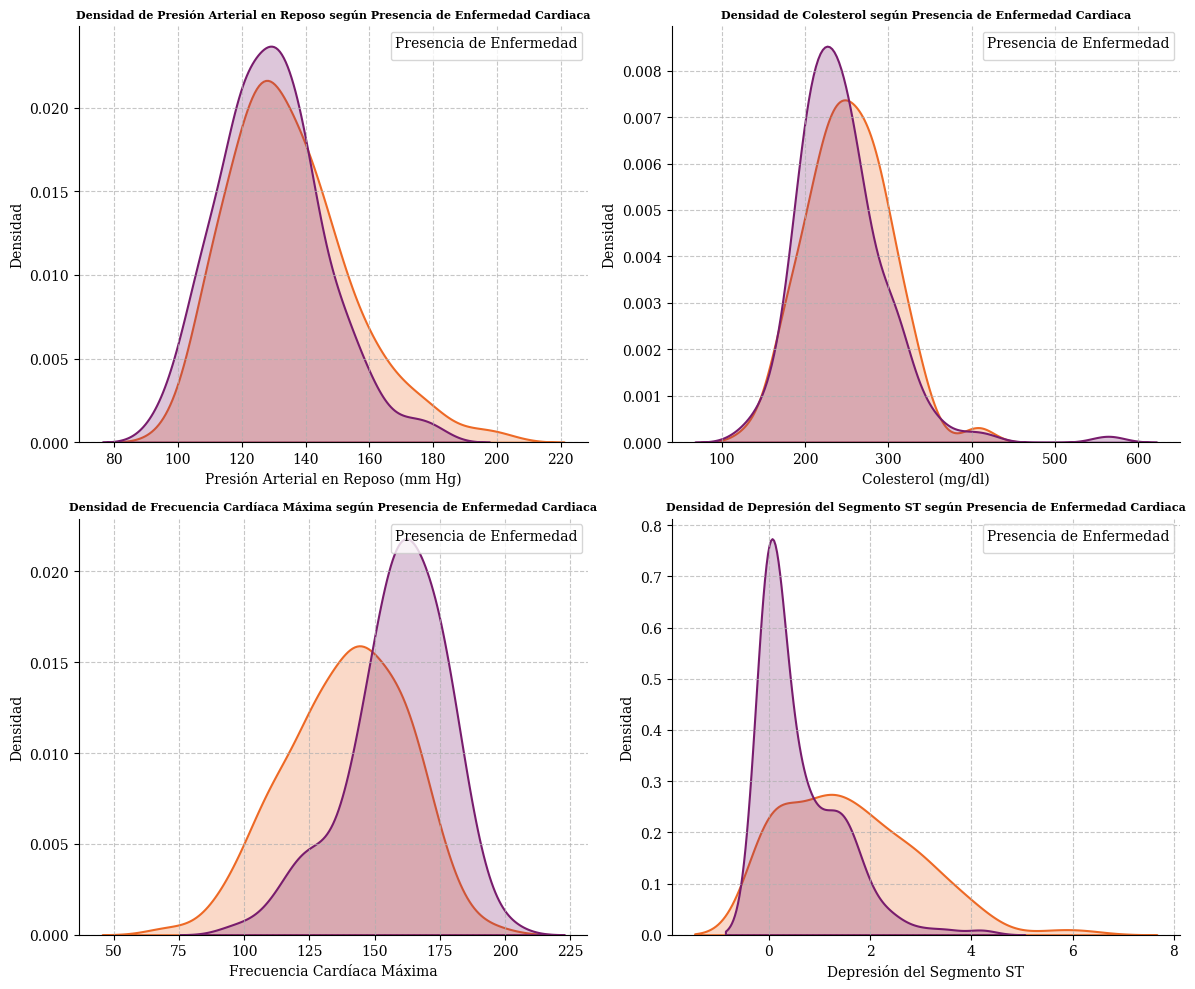

In [14]:
# Ajuste de los gráficos en una cuadrícula 2x2
plt.figure(figsize=(12, 10))  # Tamaño total de la figura

# Primer gráfico - trestbps
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='trestbps', hue='condition', fill=True, common_norm=False, palette='inferno', linewidth=1.5)
plt.title('Densidad de Presión Arterial en Reposo según Presencia de Enfermedad Cardiaca', fontsize=8, fontweight='bold')
plt.xlabel('Presión Arterial en Reposo (mm Hg)', fontsize=10)
plt.ylabel('Densidad', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Presencia de Enfermedad', fontsize=8)
sns.despine()

# Segundo gráfico - chol
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='chol', hue='condition', fill=True, common_norm=False, palette='inferno', linewidth=1.5)
plt.title('Densidad de Colesterol según Presencia de Enfermedad Cardiaca', fontsize=8, fontweight='bold')
plt.xlabel('Colesterol (mg/dl)', fontsize=10)
plt.ylabel('Densidad', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Presencia de Enfermedad', fontsize=8)
sns.despine()

# Tercer gráfico - thalach
plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x='thalach', hue='condition', fill=True, common_norm=False, palette='inferno', linewidth=1.5)
plt.title('Densidad de Frecuencia Cardíaca Máxima según Presencia de Enfermedad Cardiaca', fontsize=8, fontweight='bold')
plt.xlabel('Frecuencia Cardíaca Máxima', fontsize=10)
plt.ylabel('Densidad', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Presencia de Enfermedad', fontsize=8)
sns.despine()

# Cuarto gráfico - oldpeak
plt.subplot(2, 2, 4)
sns.kdeplot(data=df, x='oldpeak', hue='condition', fill=True, common_norm=False, palette='inferno', linewidth=1.5)
plt.title('Densidad de Depresión del Segmento ST según Presencia de Enfermedad Cardiaca', fontsize=8, fontweight='bold')
plt.xlabel('Depresión del Segmento ST', fontsize=10)
plt.ylabel('Densidad', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Presencia de Enfermedad', fontsize=8)
sns.despine()

plt.tight_layout()  # Ajusta los márgenes para que no se superpongan los gráficos
plt.show()

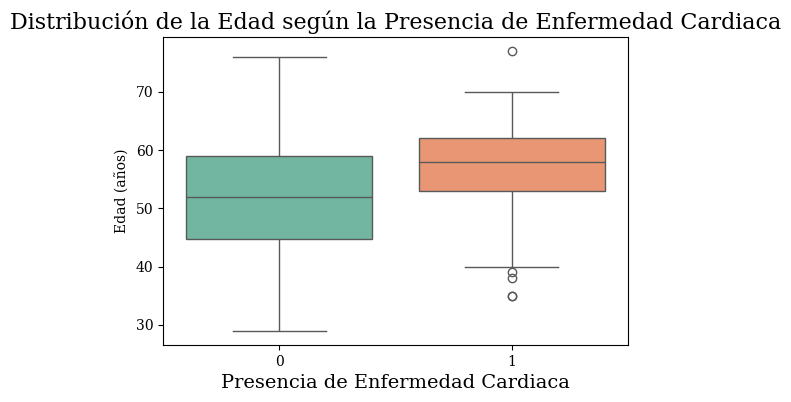

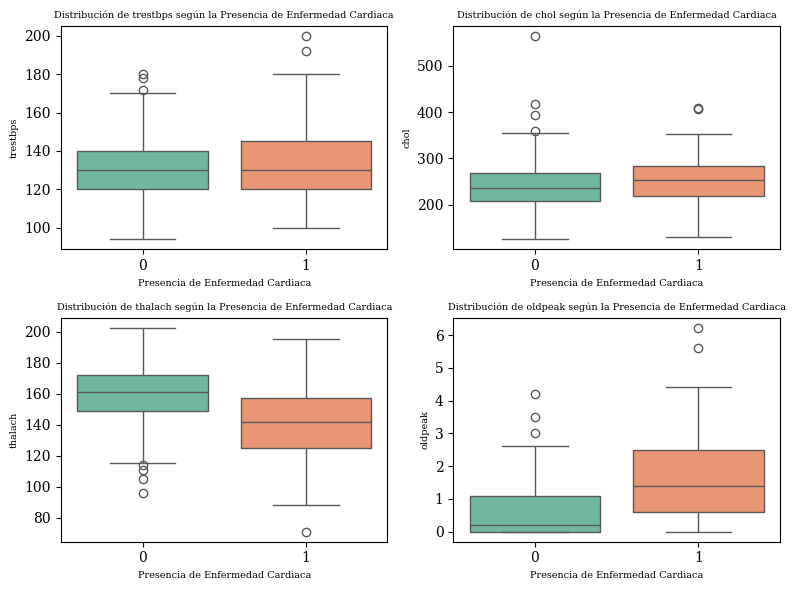

In [15]:
# Crear un gráfico de caja para la variable 'age'
plt.figure(figsize=(6, 4))
sns.boxplot(x='condition', y='age', data=df, palette='Set2')
plt.title('Distribución de la Edad según la Presencia de Enfermedad Cardiaca', fontsize=16)
plt.xlabel('Presencia de Enfermedad Cardiaca', fontsize=14)
plt.ylabel('Edad (años)', fontsize=10)
plt.show()


# Crear un gráfico de caja para múltiples variables
numerical_features = ['trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(8, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='condition', y=feature, data=df, palette='Set2')
    plt.title(f'Distribución de {feature} según la Presencia de Enfermedad Cardiaca', fontsize=7)
    plt.xlabel('Presencia de Enfermedad Cardiaca', fontsize=7)
    plt.ylabel(feature, fontsize=7)

plt.tight_layout()
plt.show()


# 4. **Entrenamiento del modelo**
---

In [22]:
# Entrenar un modelo de regresión logística
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reporte de clasificación
from sklearn.metrics import classification_report


# Definir las variables predictoras y la variable objetivo
X = df.drop('condition', axis=1)
y = df['condition']

# Normalizar y escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.88
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.81      0.86        27

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



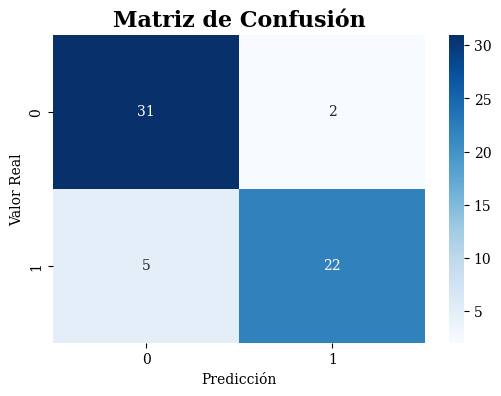

In [24]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión', fontsize=16, fontweight='bold')
plt.show()

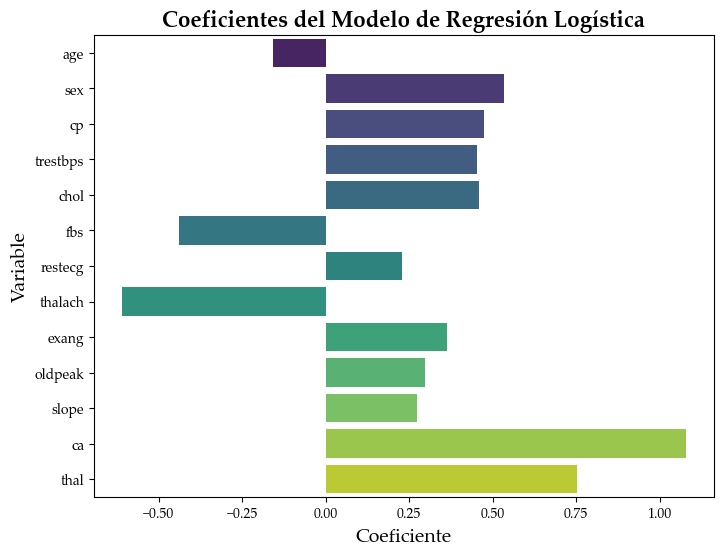

In [25]:
# Letra Palatino Linotype para todas las graficas
plt.rcParams['font.family'] = 'Palatino Linotype'

# Crear un gráfico de barras para visualizar los coeficientes del modelo
plt.figure(figsize=(8, 6))
sns.barplot(x=model.coef_[0], y=X.columns, palette='viridis')
plt.title('Coeficientes del Modelo de Regresión Logística', fontsize=16, fontweight='bold')
plt.xlabel('Coeficiente', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.show()

In [28]:
# Ajustar hiperparametros del modelo
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Entrenar el modelo
grid.fit(X_train, y_train)

# Realizar predicciones
y_pred = grid.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.88
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.81      0.86        27

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [34]:
# Ajusar hiperparametros del modelo segun su rendimiento
# Definir los hiperparámetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=15)

# Entrenar el modelo
grid.fit(X_train, y_train)

# Realizar predicciones
y_pred = grid.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.88
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.81      0.86        27

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



# **Predicción**

- Debido a que el rendimiento del modelo no puede ser mejorado más con mis conocimientos actuales. Decidí comenzar las predicciones teniendo en cuenta que la precisión es bastante alta (88%) con una incertidumbre del 12%.

- Utilizaremos las características de entrenamiento para (X) tratar de predecir la variable objetivo.

In [37]:
# Imprimir nombres de característica del conjunto de entrenamiento X_train
print(X.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


# **Consideración**

- Para realizar una predicción es necesario recordar que debemos escalar las características e introducirlas en el mismo orden en el que aparecen dentro de X_train

In [51]:
# Imprimir diccionario de datos del data_dictionary
print(data_dictionary)

{'Edad': {'Descripción': 'Edad del paciente en años', 'Tipo de dato': 'Entero'}, 'Sexo': {'Descripción': 'Sexo del paciente (1 = hombre, 0 = mujer)', 'Tipo de dato': 'Entero (binario)'}, 'cp': {'Descripción': 'Tipo de dolor torácico', 'Valores': {0: 'Angina típica', 1: 'Angina atípica', 2: 'Dolor no anginoso', 3: 'Asintomático'}, 'Tipo de dato': 'Entero'}, 'trestbps': {'Descripción': 'Presión arterial en reposo (mm Hg al ingreso en el hospital)', 'Tipo de dato': 'Entero'}, 'chol': {'Descripción': 'Colesterol sérico en mg/dl', 'Tipo de dato': 'Entero'}, 'fbs': {'Descripción': 'Glucemia en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)', 'Tipo de dato': 'Entero (binario)'}, 'restecg': {'Descripción': 'Resultados electrocardiográficos en reposo', 'Valores': {0: 'Normal', 1: 'Anormalidad en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV)', 2: 'Hipertrofia ventricular izquierda probable o definitiva según criterio de Estes'}, 'Tipo de dato': 'Entero'}, '

In [55]:
# Predicción
# Crear un diccionario con los datos de un paciente
paciente = {
    'age': 21,
    'sex': 1,
    'cp': 0,
    'trestbps': 120,
    'chol': 119,
    'fbs': 0,
    'restecg': 1,
    'thalach': 118,
    'exang': 0,
    'oldpeak': 0,
    'slope': 0,
    'ca': 0,
    'thal': 0
}


# Convertir el diccionario en un DataFrame
df_paciente = pd.DataFrame([paciente])

# Normalizar y escalar los datos
paciente_scaled = scaler.transform(df_paciente)

# Realizar una predicción
prediccion = grid.predict(paciente_scaled)

# Definir un umbral para el riesgo de enfermedad cardíaca
umbral_bajo = 0.35
umbral_moderado = 0.65
umbral_alto = 0.85

# Calcular la probabilidad de enfermedad cardíaca
probabilidad = grid.predict_proba(paciente_scaled)[0, 1]

# Imprimir el resultado de la predicción
if probabilidad < umbral_bajo:
    print('El paciente tiene un bajo riesgo de enfermedad cardíaca.')
elif probabilidad < umbral_moderado:
    print('El paciente tiene un riesgo moderado de enfermedad cardíaca.')
elif probabilidad < umbral_alto:
    print('El paciente tiene un alto riesgo de enfermedad cardíaca.')
else:
    print('El paciente tiene un riesgo muy alto de enfermedad cardíaca.')

# Imprimir la probabilidad de enfermedad cardíaca
print(f'\033[1mProbabilidad de enfermedad cardíaca:\033[0m {probabilidad * 100:.2f}%')

El paciente tiene un bajo riesgo de enfermedad cardíaca.
Probabilidad de enfermedad cardíaca: 17.89%


In [ ]:
# Cual es el codigo que activa y desactiva la negrita en un print
# \033[1m activa la negrita
# \033[0m desactiva la negrita